# Logistic Regression


#### LogisticRegression 실습 03

유방암 데이터를 이용한 분석 - 1

In [1]:
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=66)
X_train.shape

(426, 30)

In [3]:
# C=100, C=0.01 등으로 변경하면서 학습 점수의 결과를 비교
# 모델생성과 학습
model = LogisticRegression(C=1, max_iter=10000)
model.fit(X_train, y_train)

# 훈련과 테스트 스코어 비교
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9577464788732394, 0.965034965034965)

규제 매개변수 C 설정을 다르게 하여 학습 시킨 모델의 계수 표시

No handles with labels found to put in legend.


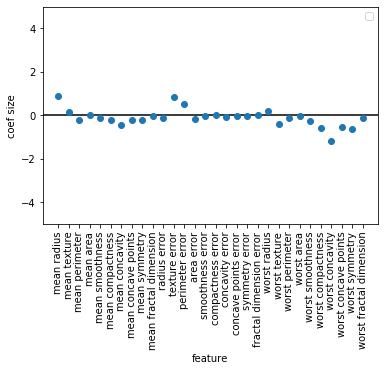

In [4]:
# 다른 C 값의 결과 추가
plt.plot(model.coef_.T, 'o')

plt.xticks( range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])

plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('feature')
plt.ylabel("coef size")
plt.legend()

- C=1에서 훈련세트와 테스트 세트 양쪽 모두 95% 정확도로 우수한 성능
- 2개의 값이 서로 비슷하여 과소적합일 수 있음 --> 모델의 제약을 더주기 위해 C값을 늘릴 필요가 있음

C를 L1규제로 사용할 경우 분류 정확도와 계수 그래프를 표시

- Regularization에서 모든 특성을 이용할지 일부 특성만을 사용할지 결정하는 주요 parameter는 'penalty'

In [5]:
model = LogisticRegression(C=100, penalty='l1', solver='liblinear', max_iter=10000)
model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.9788732394366197, 0.958041958041958)

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.92
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.90
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.98
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.97


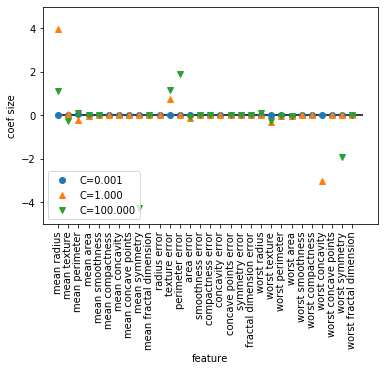

In [6]:
# C 변화에 따른 로지스틱 회귀의 훈련 정확도와 테스트 정확도 비교
for C, marker in zip( [0.001, 1, 100], ['o', '^', 'v'] ):
    model = LogisticRegression(C=C, penalty='l1', solver='liblinear', max_iter=10000)
    model.fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, model.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, model.score(X_test, y_test)))
    plt.plot( model.coef_.T, marker, label='C={:.3f}'.format(C) )
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("feature")
plt.ylabel("coef size")

plt.ylim(-5, 5)
plt.legend(loc=3)

#### LogisticRegression 실습 04

와인 데이터를 이용한 분류

In [7]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# 데이터 로드
wine = load_wine()
wine.keys()
wine.feature_names, wine.target_names

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['등급'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,등급
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
# X , y
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X.shape, y.shape

# 훈련, 테스트 데이터 나누기.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
model = LogisticRegression(C=0.1, max_iter=10000)
model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.9774436090225563, 0.9555555555555556)

#### LogisticRegression 실습 05

wave 데이터를 이용한 다중 분류

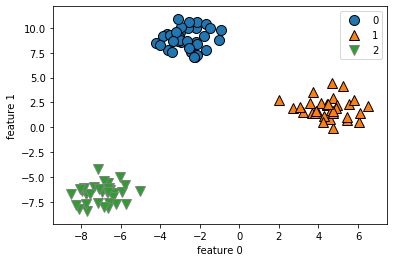

In [10]:
# 데이터 생성 및 시각화
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(random_state=42)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.legend()
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

In [11]:
# 훈련셋 및 테스트셋 분리 및 LogisticRegression 실행


In [12]:
# 예측하기


In [13]:
# 평가하기


In [14]:
# 실행 결과 시각화


#### LogisticRegression 실습 06

붓꽃 데이터 셋을 이용한 다중 분류

In [15]:
# 데이터 로드
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


In [16]:
# 데이터 분리
# 훈련 데이터를 75%, 테스트 데이터를 25% 선택


In [17]:
# LogisticRegression 수행


In [18]:
# 훈련 스코어와 테스트 스코어 비교

In [19]:
# 예측

In [20]:
# 다중분류
# make_blobs()함수는 n개의 무작위 데이터 클러스터를 생성


In [21]:
# LinearSVC 비교

In [22]:
# 결정경계
# 꽃잎의 너비가 0~3cm 인 꽃에 대해 모델의 추정 확률을 계산

#### Logistic Regression 특징

- C 값에 의해 규제 (L1, L2 모두 사용)
- 학습속도가 빠르고 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터 셋에도 잘 동작함 (solver='sag')

#### 소프트맥스

- 다항 로지스틱스

> \\( { y }_{ k }=\frac { exp({ a }_{ k }) }{ \sum _{ i=1 }^{ n }{ exp({ a }_{ i }) }  }  \\)

In [23]:
# 지수함수
# 지수의 합
# 확률

In [24]:
# 오버플로 발생 계산안됨!

In [25]:
# 오버플로 대책